In [467]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
from prettytable import PrettyTable
import statsmodels.api as sm
import plotly.express as px

# Sklearn models to compare
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Sklearn extras
...

# Warnings
import warnings
warnings.filterwarnings("ignore")

## Reading the Data

In [495]:
# Read in data and display a sample, drop two additional index columns
us_wildfires = pd.read_csv("FW_Veg_Rem_Combined.csv")
us_wildfires.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

us_wildfires.head()

,fire_name,fire_size,fire_size_class,stat_cause_descr,latitude,longitude,state,disc_clean_date,cont_clean_date,discovery_month,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,NaN,10.0,C,Missing/Undefined,18.105072,-66.753044,PR,2/11/2007,NaN,Feb,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,NaN,3.0,B,Arson,35.038330,-87.610000,TN,12/11/2006,NaN,Dec,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,NaN,60.0,C,Arson,34.947800,-88.722500,MS,2/29/2004,NaN,Feb,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,WNA 1,1.0,B,Debris Burning,39.641400,-119.308300,NV,6/6/2005,6/6/2005,Jun,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,NaN,2.0,B,Miscellaneous,30.700600,-90.591400,LA,9/22/1999,NaN,Sep,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633


## EDA 

In [496]:
# Look at shape, data types, null values, and statistics of numerical values
us_wildfires.shape

(55367, 41)

In [497]:
us_wildfires.dtypes;

In [498]:
us_wildfires.isna().sum();

In [499]:
us_wildfires.describe()

,fire_size,latitude,longitude,disc_pre_year,dstation_m,wstation_wban,wstation_byear,wstation_eyear,Vegetation,fire_mag,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
count,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,...,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000
mean,2104.645161,36.172866,-94.757971,2003.765474,40256.474678,61029.607311,1979.341900,2015.480990,11.066068,9.414366,...,1.132284,40.781796,38.453935,37.001865,25.056738,26.277046,11.654253,4.689920,15.590440,0.236799
std,14777.005364,6.724348,15.878194,6.584889,25272.081410,40830.393541,23.372803,6.767851,5.595719,26.820363,...,2.030611,31.086856,31.042541,30.827885,31.187638,112.050198,56.920510,31.205327,59.757113,0.144865
min,0.510000,17.956533,-165.936000,1991.000000,6.166452,100.000000,1931.000000,1993.000000,0.000000,0.100000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.200000,32.265960,-102.541513,1999.000000,21373.361515,13927.000000,1973.000000,2010.000000,9.000000,0.100000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.137800
50%,4.000000,34.600000,-91.212359,2005.000000,35621.334820,73803.000000,1978.000000,2020.000000,12.000000,0.100000,...,0.000000,55.657480,51.753846,48.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.202114
75%,20.000000,38.975235,-82.847500,2009.000000,53985.904315,99999.000000,2004.000000,2020.000000,15.000000,1.000000,...,2.848603,67.384352,65.911469,64.645296,60.193606,18.900000,3.600000,0.000000,0.000000,0.284782
max,606945.000000,69.849500,-65.285833,2015.000000,224153.661800,99999.000000,2014.000000,2020.000000,16.000000,100.000000,...,24.200000,96.000000,94.000000,96.000000,94.000000,13560.800000,2527.000000,1638.000000,2126.000000,1.000000


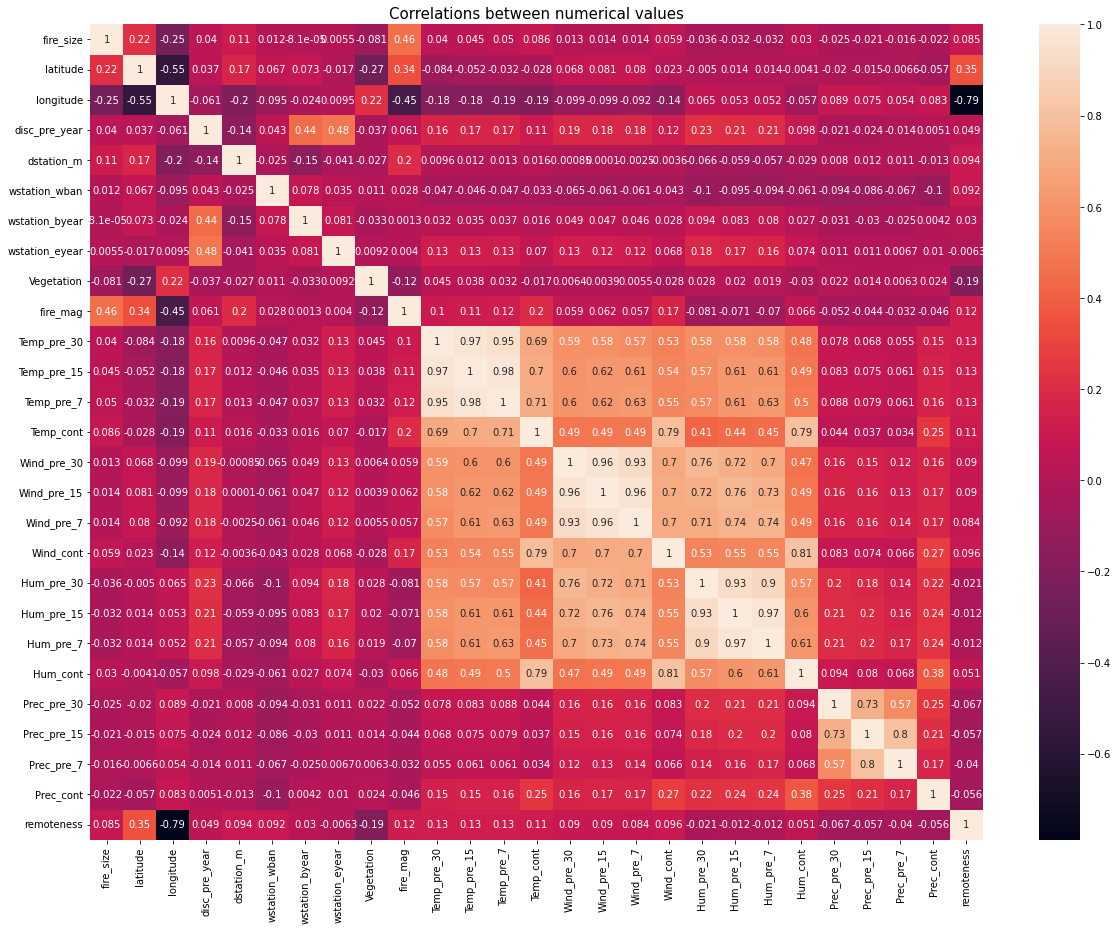

In [500]:
%matplotlib inline

# Any values correlated to one another?
plt.figure(figsize=(20, 15))
us_wildfires_corr = us_wildfires.corr()
sns.heatmap(us_wildfires_corr, annot=True)
plt.title('Correlations between numerical values', size=15);

## Data Cleaning

In [474]:
# Remember the goal is to find information that helps prior to the fire being ignitied, so any values indicating what happens during or after the fire is irrelevant for the project
# This means removing all dates, times, and features that do not help the model make a prediction
# Since we will be dealing with regression, we really only want continuous values

In [475]:
# Also drop ALL rows that have missing values that correspond to the prediction of fire size, i.e. humidity = -1 (cannot happen)
us_wildfires.drop(us_wildfires.index[us_wildfires['Hum_cont'] <= 0], inplace=True)

# Drop all N/A's, exclude all 'objects', and set a boundary for fire size to reduce outliers
us_wildfires.dropna(axis=1, inplace=True)
us_wildfires_new = us_wildfires.select_dtypes(exclude=['object'])

us_wildfires_new = us_wildfires_new[(us_wildfires_new['fire_size'] < 100000) & (us_wildfires_new['fire_size'] > 10000)]

us_wildfires_new = us_wildfires_new.reset_index(drop=True)
us_wildfires_new.columns

Index(['fire_size', 'latitude', 'longitude', 'disc_pre_year', 'dstation_m',
       'wstation_wban', 'wstation_byear', 'wstation_eyear', 'Vegetation',
       'fire_mag', 'Temp_pre_30', 'Temp_pre_15', 'Temp_pre_7', 'Temp_cont',
       'Wind_pre_30', 'Wind_pre_15', 'Wind_pre_7', 'Wind_cont', 'Hum_pre_30',
       'Hum_pre_15', 'Hum_pre_7', 'Hum_cont', 'Prec_pre_30', 'Prec_pre_15',
       'Prec_pre_7', 'Prec_cont', 'remoteness'],
      dtype='object')

In [476]:
# Since year other than the initial year isn't an impact on fire growth, lets remove that as well
us_wildfires_new.drop(['wstation_byear', 'wstation_eyear', 'fire_mag', 'wstation_wban', 'disc_pre_year', 'Vegetation', 'latitude', 'longitude', 
                       'Temp_pre_30', 'Temp_pre_15', 'Wind_pre_30', 'Wind_pre_15', 'Hum_pre_30', 'Hum_pre_15', 'Prec_pre_30', 'Prec_pre_15'], axis=1, inplace=True)
us_wildfires_new.head()

,fire_size,dstation_m,Temp_pre_7,Temp_cont,Wind_pre_7,Wind_cont,Hum_pre_7,Hum_cont,Prec_pre_7,Prec_cont,remoteness
0,19520.0,74419.77606,21.286573,18.320038,1.436072,1.341442,50.076152,43.996143,0.0,0.0,0.439851
1,13804.0,65357.19788,31.240659,31.901136,2.068132,2.479545,26.780220,21.655303,0.0,0.0,0.370605
2,67008.0,26725.24288,12.034091,16.954545,5.215909,7.877273,29.522727,23.727273,0.0,0.0,0.334021
3,33362.6,64208.32332,19.017073,16.496714,1.895732,2.621067,49.713415,68.146364,0.0,0.0,0.891830
4,10204.0,65196.19993,29.466667,28.663717,2.995000,3.208850,26.050000,40.398230,0.0,0.3,0.421364


In [477]:
# Now time to scale using StandardScalar()
scaler = StandardScaler()
target  = us_wildfires_new['fire_size']
wildfire = us_wildfires_new.loc[:, us_wildfires_new.columns != 'fire_size']
us_wildfires_scaled = pd.DataFrame(scaler.fit_transform(wildfire), columns=wildfire.columns)

# Display - Now left with only features that lead up to fire ignition and fire growth (location, temp, wind, humidity, precip, and remoteness)
us_wildfires_scaled.head()

,dstation_m,Temp_pre_7,Temp_cont,Wind_pre_7,Wind_cont,Hum_pre_7,Hum_cont,Prec_pre_7,Prec_cont,remoteness
0,0.521953,0.139059,-0.308088,-1.190405,-1.251966,0.428023,-0.163307,-0.171935,-0.384757,0.571805
1,0.231629,1.655466,1.941156,-0.736693,-0.529249,-0.930909,-1.457764,-0.171935,-0.384757,0.294891
2,-1.005965,-1.270466,-0.534235,1.522881,2.898407,-0.770929,-1.337712,-0.171935,-0.384757,0.148587
3,0.194824,-0.206677,-0.610059,-0.860447,-0.439381,0.406863,1.235989,-0.171935,-0.384757,2.379283
4,0.226471,1.385216,1.404988,-0.071358,-0.066128,-0.973505,-0.371775,-0.171935,-0.373196,0.497876


In [478]:
# Finally, prep the data for modeling 
X = us_wildfires_scaled
y = target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lst = [X_train, X_test, y_train, y_test]
for size in lst:
    print(size.shape)

(1172, 10)
(293, 10)
(1172,)
(293,)


## Visualizations

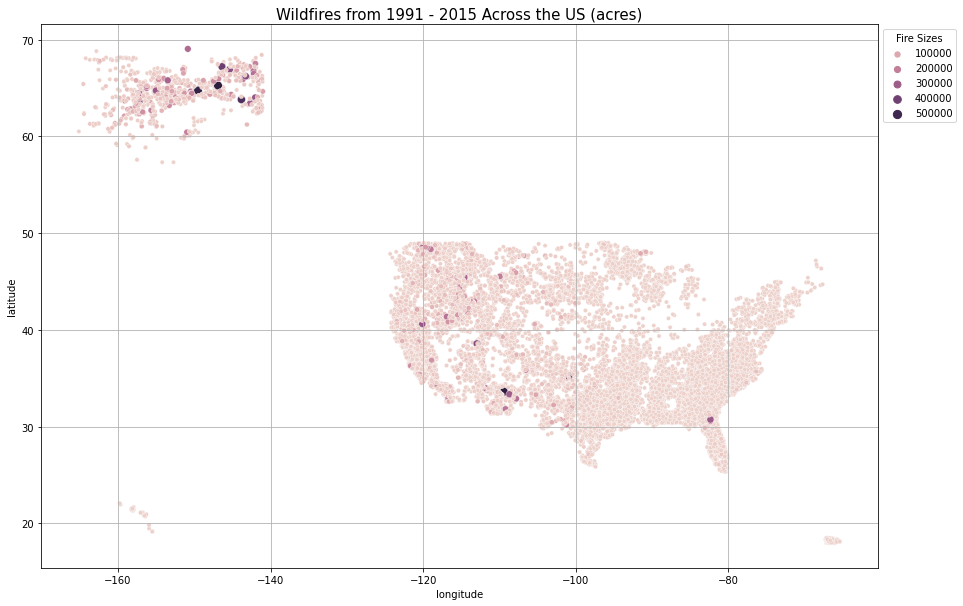

In [479]:
# Plot areas that experience the most fires with the UNSCALED lat and lon from original df
plt.figure(figsize=(15, 10))
sns.scatterplot(data=us_wildfires, x='longitude', y='latitude', size='fire_size', hue='fire_size', alpha=1)
plt.legend(title="Fire Sizes", bbox_to_anchor=(1, 1),
           loc="upper left")
plt.title("Wildfires from 1991 - 2015 Across the US (acres)", size=15)
plt.grid()

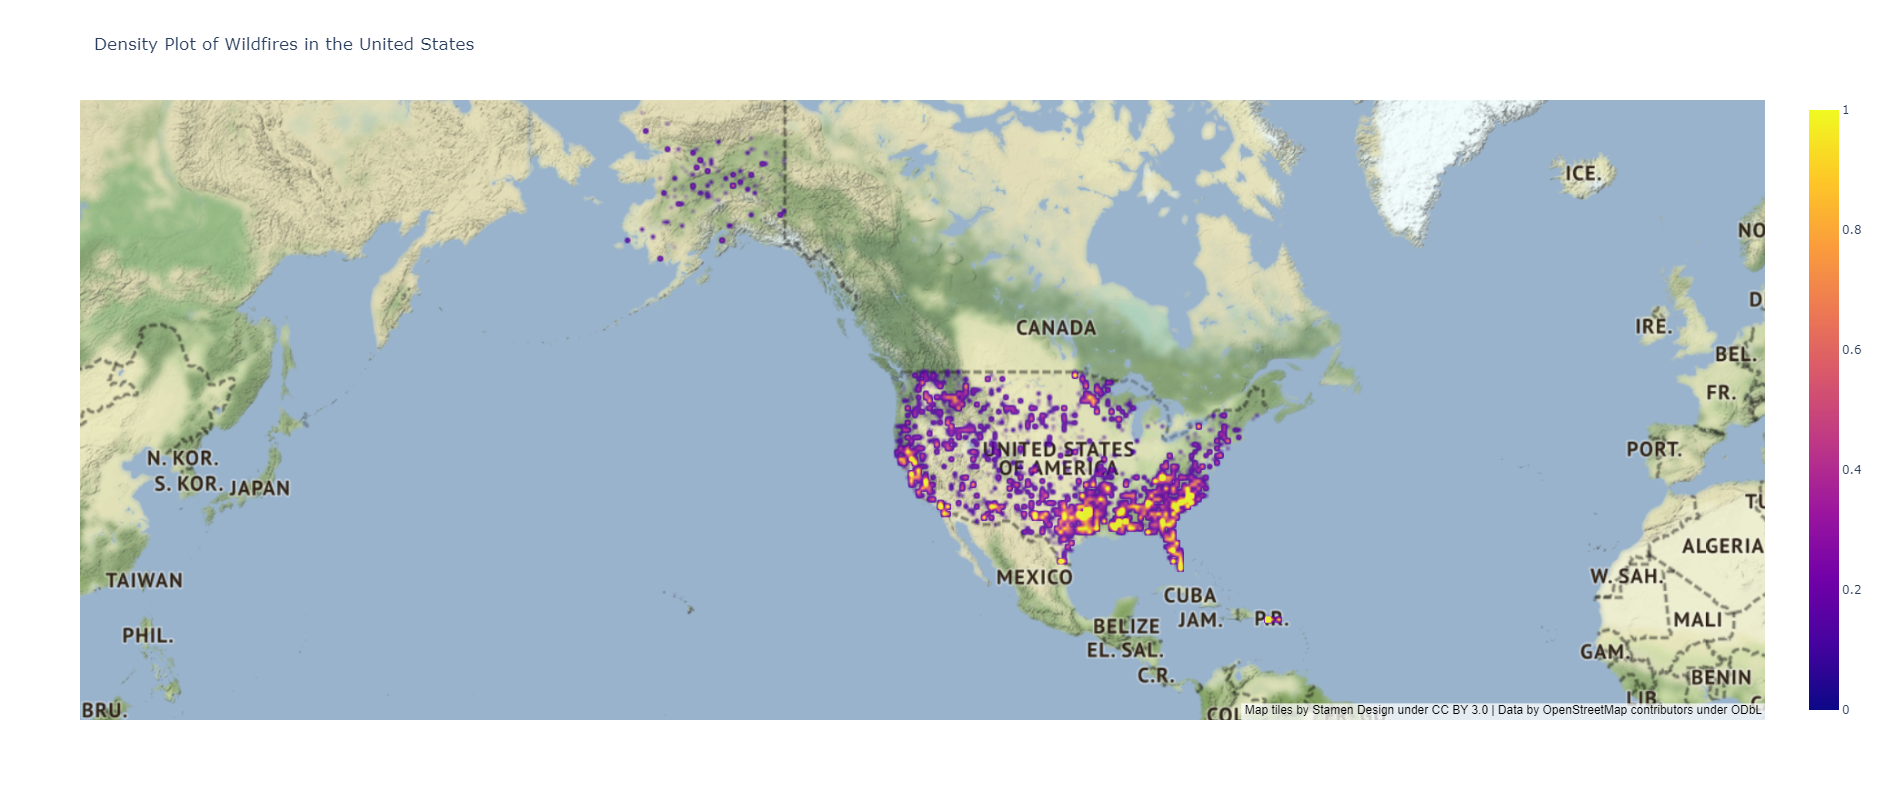

In [480]:
# Create a density plot to show locations
fig = px.density_mapbox(us_wildfires, lat='latitude', lon='longitude', radius=1, center=dict(lat=45, lon=-120),
                 mapbox_style='stamen-terrain', zoom=2.2, title="Density Plot of Wildfires in the United States", opacity=0.85)
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)

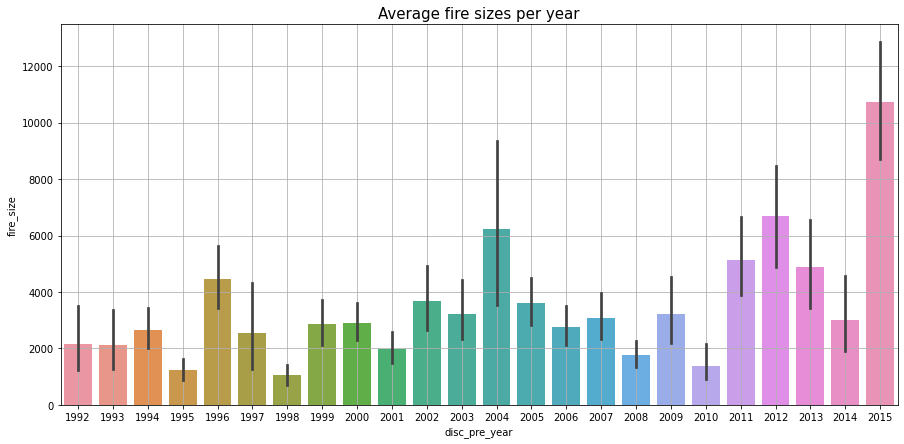

In [481]:
plt.figure(figsize=(15,7))
sns.barplot(data=us_wildfires, x='disc_pre_year', y='fire_size')
plt.title("Average fire sizes per year", size=15);
plt.grid()

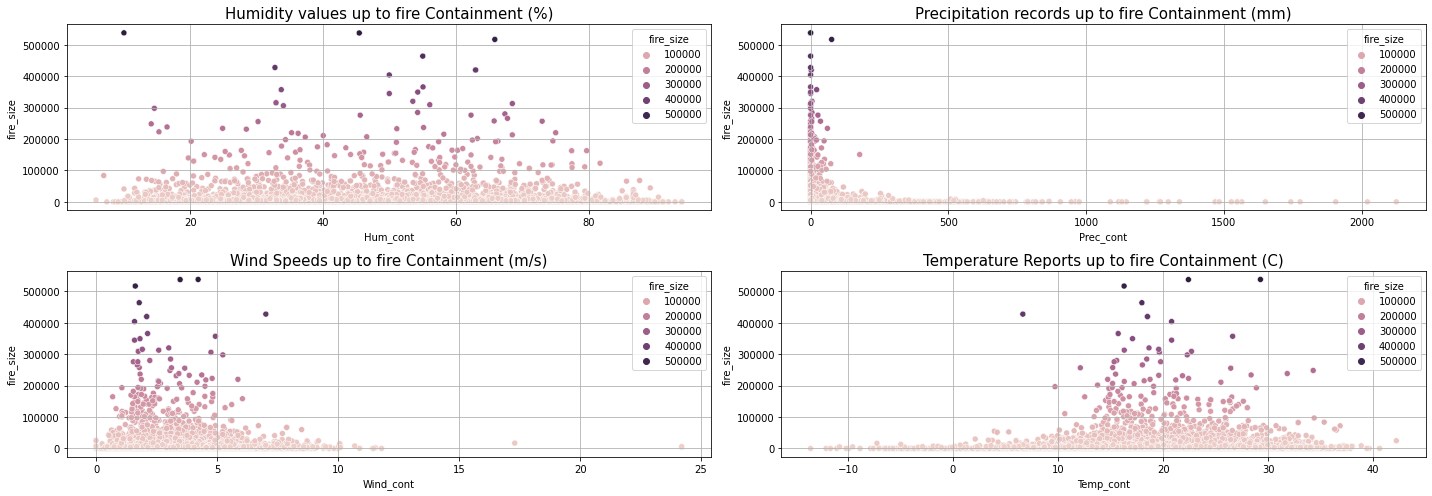

In [482]:
# Look at some numerical values versus the target that will be used in the model
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 7))
sns.scatterplot(data=us_wildfires, x='Hum_cont', y='fire_size', hue='fire_size', ax=ax[0,0])
ax[0,0].set_title("Humidity values up to fire Containment (%)", size=15)
ax[0,0].grid()

sns.scatterplot(data=us_wildfires, x='Wind_cont', y='fire_size', hue='fire_size', ax=ax[1,0])
ax[1,0].set_title("Wind Speeds up to fire Containment (m/s)", size=15)
ax[1,0].grid()

sns.scatterplot(data=us_wildfires, x='Prec_cont', y='fire_size', hue='fire_size', ax=ax[0,1])
ax[0,1].set_title("Precipitation records up to fire Containment (mm)", size=15)
ax[0,1].grid()

sns.scatterplot(data=us_wildfires, x='Temp_cont', y='fire_size', hue='fire_size', ax=ax[1,1])
ax[1,1].set_title("Temperature Reports up to fire Containment (C)", size=15)
ax[1,1].grid()
plt.tight_layout()

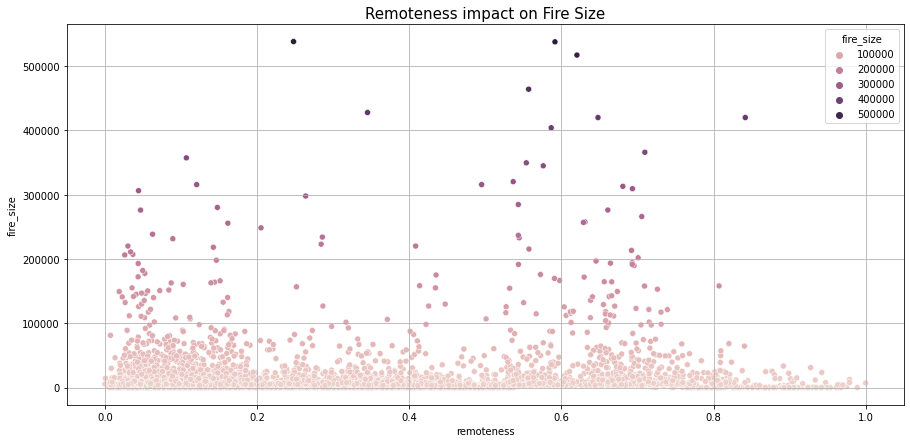

In [483]:
# Look at remoteness vers fire size
plt.figure(figsize=(15, 7))
sns.scatterplot(data=us_wildfires, x='remoteness', y='fire_size', hue='fire_size')
plt.title('Remoteness impact on Fire Size', size=15)
plt.grid()

## Model Construction

In [484]:
# Before any modeling, plot some scaled attributes against the target

<AxesSubplot:xlabel='Hum_cont', ylabel='fire_size'>

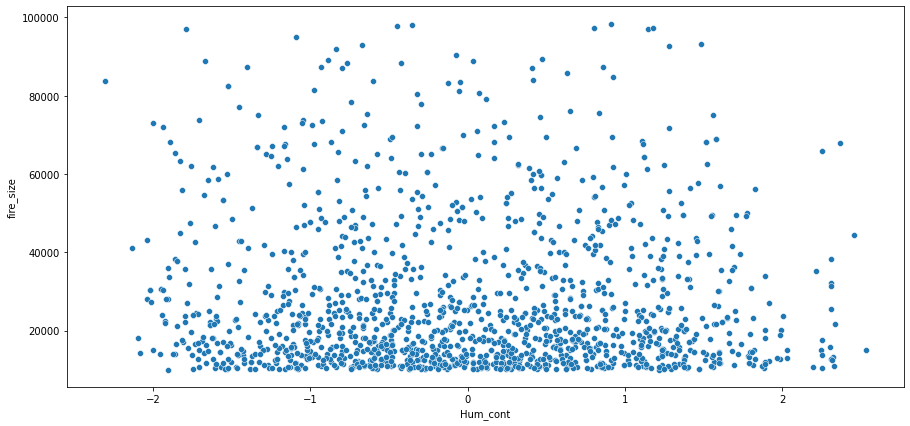

In [486]:
tester_df = us_wildfires_scaled.join(target)

plt.figure(figsize=(15,7))
sns.scatterplot(data=tester_df, x='Hum_cont', y='fire_size')

#### Base Linear Regression

In [492]:
# Start with a base, use OLS
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict both train and test
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Display the mse/rmse
train_scores = mean_squared_error(y_train, y_pred_train) 
test_scores = mean_squared_error(y_test, y_pred_test)

print(f"Train RMSE: {np.sqrt(train_scores)} | Test RMSE: {np.sqrt(test_scores)}")
print(f"Train Score: {round(lr.score(X_train, y_train), 5)} | Test Score: {round(lr.score(X_test, y_test), 5)}")

Train RMSE: 18545.311177128453 | Test RMSE: 18620.628493664062
Train Score: 0.02917 | Test Score: -0.01714


In [1]:
# Create an OLS model
y = target
feature_matrix = sm.add_constant(us_wildfires_scaled, prepend=False)

# Fit and summarize OLS model
model = sm.OLS(y, feature_matrix)
res = model.fit()
print(res.summary())

NameError: name 'target' is not defined

Text(0.5, 1.0, 'Residuals from OLS')

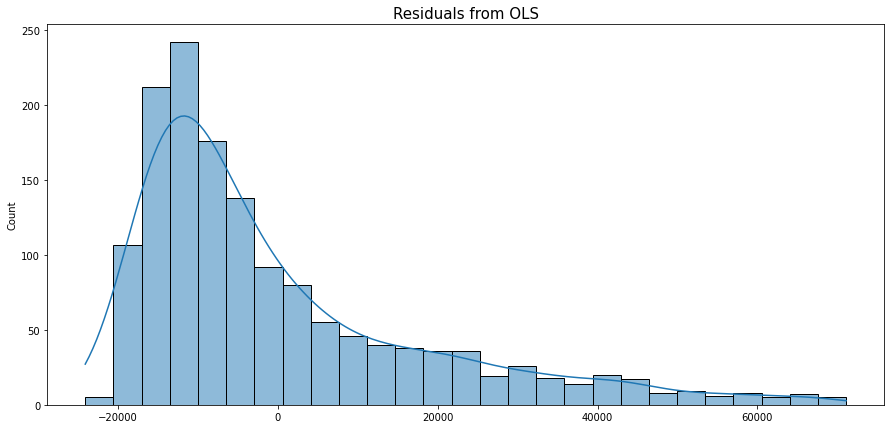

In [494]:
# Create a histogram of the residuals
plt.figure(figsize=(15,7))
sns.histplot(res.resid, kde=True);
plt.title("Residuals from OLS", size=15)

#### Support Vector Regressor (SVR)

In [487]:
# Instantiate both a SVR and kNN Regressor model, starting with the SVR without any modifications to its parameters
svr = SVR()
svr.fit(X_train, y_train)

# Predict both train and test
y_pred_train_svr = svr.predict(X_train)
y_pred_test_svr = svr.predict(X_test)

# Display the mse/rmse
train_scores_svr = mean_squared_error(y_train, y_pred_train_svr) 
test_scores_svr = mean_squared_error(y_test, y_pred_test_svr)

print(f"Train RMSE: {np.sqrt(train_scores_svr)}")
print(f"Test RMSE: {np.sqrt(test_scores_svr)}")

Train RMSE: 20138.27415933461
Test RMSE: 19285.010475373267


#### kNN Regression

In [ ]:
# Now implement the kNN Regressor without any modifications to its parameters
knn = KNeighborsRegressor()

## Model Tuning

In [ ]:
# Apply GridSearchCV to tune the parameters of both models, compare results and establish conclusions
svr_params = {}
knn_params = {}

In [ ]:
svr_grid = GridSearchCV()
knn_grid = GridSearchCV()

## Model Evaluations and Comparisons